In [1]:
# Import necessary packages
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Viz
import matplotlib.pyplot
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt


# evaluation metrics
from scipy.stats import pearsonr
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [2]:

df = pd.read_csv("data_final_with_gng.csv", encoding = "ISO-8859-1") 

#### Relativise Features

In [3]:
"""df["Early_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())['Early_Recent']
df["Finish_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())['Finish_Recent']
df["Odds_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())['Odds_Recent']
df["Early_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Early_380"]
df["Finish_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Finish_380"]
df["Odds_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Odds_380"]
df["Stay_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Stay_380"]
df["Early_Time_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Early_Time_380"]
df["Time_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Time_380"]"""

'df["Early_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())[\'Early_Recent\']\ndf["Finish_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())[\'Finish_Recent\']\ndf["Odds_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())[\'Odds_Recent\']\ndf["Early_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Early_380"]\ndf["Finish_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Finish_380"]\ndf["Odds_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Odds_380"]\ndf["Stay_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Stay_380"]\ndf["Early_Time_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Early_Time_380"]\ndf["Time_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Time_380"]'

In [4]:
# add Gng
factors = ['Race_ID','Trap','Odds','BSP','Public_Estimate','Last_Run','Distance_All','Finish_All',
'Distance_Places_All','Races_All','Distance_Recent','Finish_Recent','Odds_Recent','Early_Recent',
'Races_380','Wins_380','Finish_380','Odds_380','Early_380','Grade_380','Time_380','Early_Time_380',
'Stay_380','Favourite','Finished','Wide_380','Dist_By','Gng','Winner']

### Training & Validation

In [5]:
df_train_validate = df[0:11670]# Training and validation
df_test = df[11670:]# Final Testing

#### Drop Poorly Correlated

In [6]:
drop_cols = ['Winner','Public_Estimate','Odds','Race_ID']
df_m = df_train_validate.drop(columns=drop_cols)

In [7]:
train_size = 9870
train = df_m[0:train_size:]
validation = df_m[train_size:]
validation_all_features = df_train_validate[train_size:]
target="Finished"

train_X = train.drop(columns=[target])
train_y = train[target]
validation_X = validation.drop(columns=[target])
validation_y = validation[target]

In [8]:
model = GradientBoostingClassifier(n_estimators=10)

model.fit(train_X,train_y)
print("Training Accuracy",round(accuracy_score(train_y, model.predict(train_X)),3))

Training Accuracy 0.272


In [9]:
predicted_fin = model.predict(validation_X)
print("Validation Accuracy",round(accuracy_score(validation_y, predicted_fin),3))

Validation Accuracy 0.225


In [10]:
public_y = list(validation_all_features['Public_Estimate'])

In [11]:
print("Public Accuracy",round(accuracy_score(validation_y,public_y),3))

Public Accuracy 0.219


#### Validation R-squared, Coefficient of Determination

0.071


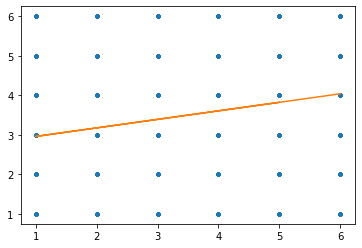

In [12]:
# Sample data
x,y = predicted_fin,validation_y
print(round(pearsonr(predicted_fin,validation_y)[0]**2,3))
# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

#### Validation R-squared (market)

0.069


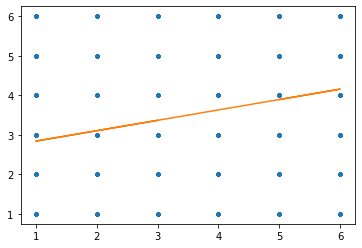

In [13]:
# Sample data
x,y = np.array(public_y), validation_y
print(round(pearsonr(public_y,validation_y)[0]**2,3))
# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m*x, '-')
plt.show()

#### Validation, Mean Absolute Error

In [14]:
print("Mean Absolute Error")
print("- - - - - - - - - - - - - - -")
print("Model: ",round(mean_absolute_error(validation_y,predicted_fin),3))
print("Market:",round(mean_absolute_error(validation_y,public_y),3))

Mean Absolute Error
- - - - - - - - - - - - - - -
Model:  1.802
Market: 1.606


#### Feature Importances

In [15]:
importances = model.feature_importances_

In [16]:
col_importances = zip(train_X.columns,importances)
col_importances = sorted([(x[0],round(x[1],2)) for x in col_importances], key=lambda x: x[1],reverse=True)

In [17]:
num = 1
for col_imp in col_importances:
    print(col_imp[0],(20 - len(col_imp[0]))*" ",str(int(col_imp[1]*100))+"%","*"*int(col_imp[1]*100))
    #print("- - -")
    num+=1

BSP                   53% *****************************************************
Finish_All            6% ******
Distance_All          4% ****
Races_All             4% ****
Finish_Recent         4% ****
Odds_Recent           3% ***
Races_380             3% ***
Early_Time_380        3% ***
Stay_380              3% ***
Last_Run              2% **
Distance_Places_All   2% **
Distance_Recent       2% **
Early_Recent          2% **
Dist_By               2% **
Trap                  1% *
Wins_380              1% *
Finish_380            1% *
Odds_380              1% *
Grade_380             1% *
Time_380              1% *
Wide_380              1% *
Gng                   1% *
Early_380             0% 
Favourite             0% 


In [18]:
for x in col_importances:
    print("'"+x[0]+"',")

'BSP',
'Finish_All',
'Distance_All',
'Races_All',
'Finish_Recent',
'Odds_Recent',
'Races_380',
'Early_Time_380',
'Stay_380',
'Last_Run',
'Distance_Places_All',
'Distance_Recent',
'Early_Recent',
'Dist_By',
'Trap',
'Wins_380',
'Finish_380',
'Odds_380',
'Grade_380',
'Time_380',
'Wide_380',
'Gng',
'Early_380',
'Favourite',


### Testing

In [19]:
df_test = df_test.drop(columns=drop_cols)

In [20]:
test_X = df_test.drop(columns=[target])
test_y = df_test[target]

In [21]:
predicted_fin = model.predict(test_X)
print("Test Accuracy",round(accuracy_score(test_y, predicted_fin),3))

Test Accuracy 0.219


In [22]:
public_y = list(df[11670:]['Public_Estimate']) # converting to list so its the same type as test_y

In [23]:
print("Public Accuracy",round(accuracy_score(test_y,public_y),3))

Public Accuracy 0.212


### Accuracy for each class

In [24]:
matrix = confusion_matrix(test_y, predicted_fin)
labls = ["First","Second","Third","Fourth","Fifth","Sixth"]
acc_scores = [round(x,2) for x in list(matrix.diagonal()/matrix.sum(axis=1))]
accs = zip(labls,acc_scores)
print("Accuracy Score Each Class")
print("- - - - - - - - - - - - - - - - - - - - ")
for a in accs:
    print(a[0]," "*(9-len(a[0])),a[1])

Accuracy Score Each Class
- - - - - - - - - - - - - - - - - - - - 
First      0.48
Second     0.08
Third      0.09
Fourth     0.11
Fifth      0.11
Sixth      0.43


In [25]:
# ALL 0.274,0.226
# ~'Early_380','Favourite' 0.273,0.226
# ~'Grade_380','Wide_380' 0.268,0.232
# ~'Wins_380','Finish_380' 0.269,0.231
# ~'Time_380','Trap' 0.271,0.227
# ~'Early_Recent','Odds_380 0.269,0.227
# ~'Last_Run','Distance_Recent' 0.269,0.225
# ~'Races_380','Early_Time_380' 0.265,0.224

In [26]:
# REMOVE 6
'''
'Stay_380',
'Last_Run',
'Distance_Places_All',
'Distance_Recent',
'Early_Recent',
'Odds_380',
'Time_380',
'Trap'
'''
# 0.269, 0.231

# REMOVE 14
'''
'Stay_380',
'Last_Run',
'Distance_Places_All',
'Distance_Recent',
'Early_Recent',
'Odds_380',
'Time_380',
'Trap',
'Wins_380',
'Finish_380',
'Grade_380',
'Wide_380',
'Early_380',
'Favourite'
'''
# 0.268,0.222

"\n'Stay_380',\n'Last_Run',\n'Distance_Places_All',\n'Distance_Recent',\n'Early_Recent',\n'Odds_380',\n'Time_380',\n'Trap',\n'Wins_380',\n'Finish_380',\n'Grade_380',\n'Wide_380',\n'Early_380',\n'Favourite'\n"

### Mean Absolute Error

In [27]:
print("Mean Absolute Error")
print("- - - - - - - - - - - - - - -")
print("Model: ",round(mean_absolute_error(test_y,predicted_fin),3))
print("Market:",round(mean_absolute_error(test_y,public_y),3))

Mean Absolute Error
- - - - - - - - - - - - - - -
Model:  1.908
Market: 1.681


### R-squared (Coefficient of Determination)

In [28]:
print("R-squared Score/Error")
print("- - - - - - - - - - - - - - -")
print("Model: ",round(r2_score(test_y,predicted_fin),3))
print("Market:",round(r2_score(test_y,public_y),3))

R-squared Score/Error
- - - - - - - - - - - - - - -
Model:  -1.056
Market: -0.585


### Pearson Correlation of Model Preds/Market Preds and Real Fin Position/Results

#### Model

0.035


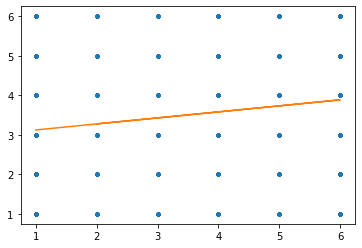

In [29]:
# Sample data
x,y = np.array(predicted_fin),test_y
print(round(pearsonr(predicted_fin,test_y)[0]**2,3))
# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

#### Public

0.043


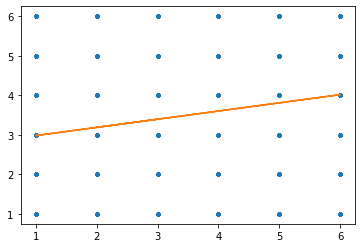

In [30]:
# Sample data
x,y = np.array(public_y), test_y
print(round(pearsonr(public_y,test_y)[0]**2,3))
# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m*x, '-')
plt.show()

In [31]:
the_dict = {'one':0,'two':0,'three':0,'four':0,'five':0,'six':0}

for x in predicted_fin:
    if x ==1:
        the_dict['one']+=1
    elif x ==2:
        the_dict['two']+=1
    elif x ==3:
        the_dict['three']+=1
    elif x ==4:
        the_dict['four']+=1
    elif x ==5:
        the_dict['five']+=1
    elif x ==6:
        the_dict['six']+=1

In [32]:
print(the_dict)

{'one': 717, 'two': 177, 'three': 195, 'four': 212, 'five': 201, 'six': 670}


### Classification Report

In [33]:
target_names = ['first', 'second', 'third','fourth', 'fifth', 'sixth']
print(classification_report(test_y, predicted_fin, target_names=target_names))

              precision    recall  f1-score   support

       first       0.24      0.48      0.32       362
      second       0.16      0.08      0.10       363
       third       0.17      0.09      0.12       361
      fourth       0.19      0.11      0.14       362
       fifth       0.20      0.11      0.15       362
       sixth       0.23      0.43      0.30       362

    accuracy                           0.22      2172
   macro avg       0.20      0.22      0.19      2172
weighted avg       0.20      0.22      0.19      2172



### Probability Win

In [34]:
predicted_fin = model.predict_proba(test_X)
win_probs = [x[0] for x in predicted_fin]
test_X['WIN_PROB'] = win_probs

In [35]:
test_X = test_X.reset_index()
test_X =test_X.drop(columns=['index'])
test_X.head()

,Trap,BSP,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,Distance_Recent,Finish_Recent,Odds_Recent,...,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Wide_380,Dist_By,Gng,WIN_PROB
0,6.0,4.66,12,387.42,3.63,381.70,45,380.0,3.43,3.86,...,2.86,6.71,24.28,3.67,0.57,1.0,0.57,-3.43,20.0,0.193074
1,3.0,9.00,5,371.69,4.06,366.38,49,380.0,4.73,7.50,...,3.57,5.00,24.86,3.77,0.86,1.0,0.00,-8.43,20.0,0.142468
2,5.0,5.40,5,394.00,3.31,399.40,21,380.0,2.57,4.04,...,3.86,7.29,24.31,3.68,-1.29,1.0,0.29,-1.86,20.0,0.162536
3,1.0,3.52,12,428.70,3.57,420.00,46,380.0,3.57,5.93,...,4.29,6.57,24.27,3.71,-0.72,1.0,0.00,-3.43,20.0,0.227370
4,4.0,12.00,6,392.95,3.50,396.39,39,380.0,4.00,5.86,...,2.57,5.29,24.35,3.69,1.43,1.0,0.00,-5.32,20.0,0.109840


In [36]:
test_X = test_X.sort_values(by=['WIN_PROB'], ascending=False)

In [37]:
ind = test_X['WIN_PROB'].idxmax()

In [38]:
best = test_X.iloc[[ind]]
columns = best.columns
#the_best = []
#for col in columns:
#    the_best.append((col,best[col].item()))
#for x in the_best:
#    print(x[0],"   ",x[1])"""

In [39]:
top_9 = test_X.head(9)

In [40]:
for col in columns:
    try:
        print(col," - - - ",top_9[col].median()," - - - ",df[col].median())
    except:
        pass

Trap  - - -  3.0  - - -  3.5
BSP  - - -  2.57  - - -  6.4
Last_Run  - - -  7.0  - - -  7.0
Distance_All  - - -  380.0  - - -  389.52
Finish_All  - - -  3.79  - - -  3.61
Distance_Places_All  - - -  380.0  - - -  388.0
Races_All  - - -  16.0  - - -  43.0
Distance_Recent  - - -  380.0  - - -  380.0
Finish_Recent  - - -  3.29  - - -  3.57
Odds_Recent  - - -  4.68  - - -  5.14
Early_Recent  - - -  3.14  - - -  3.57
Races_380  - - -  12.0  - - -  24.0
Wins_380  - - -  0.14  - - -  0.18
Finish_380  - - -  3.4  - - -  3.43
Odds_380  - - -  5.0  - - -  5.14
Early_380  - - -  3.4874327000660093  - - -  3.4874327000660093
Grade_380  - - -  7.29  - - -  6.0
Time_380  - - -  24.51  - - -  24.31
Early_Time_380  - - -  3.72  - - -  3.7
Stay_380  - - -  0.0  - - -  0.0
Favourite  - - -  3.0  - - -  3.0
Wide_380  - - -  0.0  - - -  0.0
Dist_By  - - -  -4.4868803638230785  - - -  -4.0
Gng  - - -  20.0  - - -  10.0
